<a href="https://colab.research.google.com/github/manasarasur/computer-vision/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving bird.jpeg to bird.jpeg
✅ Uploaded: bird.jpeg
📷 Original Image


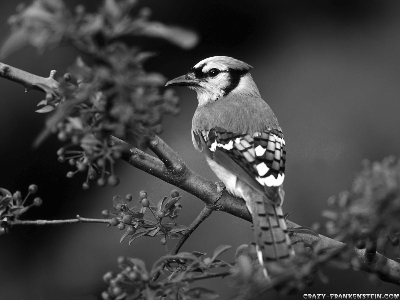

🌶️ Image with Salt & Pepper Noise


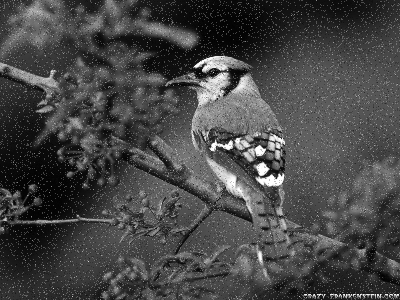

🧽 After Median Filter (Noise Removed)


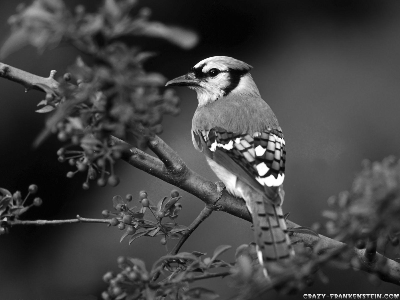

💾 Saved noisy image as noisy_output.jpg
💾 Saved denoised image as denoised_output.jpg


In [1]:
import cv2
import numpy as np
import random
from google.colab import files
from google.colab.patches import cv2_imshow

def add_salt_pepper_noise(image, prob=0.02):
    """Add Salt and Pepper noise with probability prob."""
    noisy = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_noise = int(prob * total_pixels)

    for _ in range(num_noise):
        x = random.randint(0, image.shape[0] - 1)
        y = random.randint(0, image.shape[1] - 1)
        if random.random() < 0.5:
            noisy[x, y] = 0    # pepper (black)
        else:
            noisy[x, y] = 255  # salt (white)
    return noisy

def resize_for_display(img, width=400):
    """Resize image for smaller display in Colab."""
    h, w = img.shape[:2]
    ratio = width / w
    return cv2.resize(img, (width, int(h * ratio)))

# === MAIN ===
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"✅ Uploaded: {filename}")
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("⚠️ Could not load image!")
    else:
        # Step 1: Add noise
        noisy_image = add_salt_pepper_noise(image, prob=0.05)

        # Step 2: Remove noise with Median Filter (3x3 window)
        denoised_image = cv2.medianBlur(noisy_image, 3)

        # Step 3: Resize for display
        original_small = resize_for_display(image)
        noisy_small = resize_for_display(noisy_image)
        denoised_small = resize_for_display(denoised_image)

        # Step 4: Show images
        print("📷 Original Image")
        cv2_imshow(original_small)

        print("🌶️ Image with Salt & Pepper Noise")
        cv2_imshow(noisy_small)

        print("🧽 After Median Filter (Noise Removed)")
        cv2_imshow(denoised_small)

        # Step 5: Save results
        cv2.imwrite("noisy_output.jpg", noisy_image)
        cv2.imwrite("denoised_output.jpg", denoised_image)
        print("💾 Saved noisy image as noisy_output.jpg")
        print("💾 Saved denoised image as denoised_output.jpg")
